<a id ="Importing_Required_Library"> </a>
# 5. Importing Required Library

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing required library
import h5py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, InputLayer, Reshape, MaxPooling2D, Flatten, Activation
from tensorflow.keras import layers
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
#from keras.utils.vis_utils import plot_model

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,precision_score, recall_score, f1_score, precision_recall_curve, auc

import cv2
from PIL import Image

<a id ="Dataset_Import_Visualization_and_Preprocessing"> </a>
# 7. Dataset Import, Visualization and Preprocessing

In [ ]:
filepath="/content/drive/MyDrive/Dataset/Autonomous_Vehicles_SVHN_single_grey1.h5"
df= h5py.File(filepath,'r') #read hd5 file
dataframe=np.array(df)
ls=list(dataframe)
print("List of datasets in this file: \n",ls)

X_test = np.array(df['X_test'])
X_train = np.array(df['X_train'])
X_val = np.array(df['X_val'])

y_test = np.array(df['y_test'])
y_train = np.array(df['y_train'])
y_val = np.array(df['y_val'])
print("Shape of X_train: \n",X_train.shape)
print("Shape of y_train: \n",y_train.shape)
print("Shape of X_test: \n",X_test.shape)
print("Shape of y_test: \n",y_test.shape)
print("Shape of X_val: \n",X_val.shape)
print("Shape of y_val: \n",y_val.shape)

List of datasets in this file: 
 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']
Shape of X_train: 
 (42000, 32, 32)
Shape of y_train: 
 (42000,)
Shape of X_test: 
 (18000, 32, 32)
Shape of y_test: 
 (18000,)
Shape of X_val: 
 (60000, 32, 32)
Shape of y_val: 
 (60000,)


### Data Defination:
* X_train Data volume= 42000 and size= 32x32 pixel
* X_test Data volume= 18000 and size= 32x32 pixel
* X_val Data volume= 60000 and size= 32x32 pixel


## 7.1 Data Visualization

#### Plotting Distribution of Data

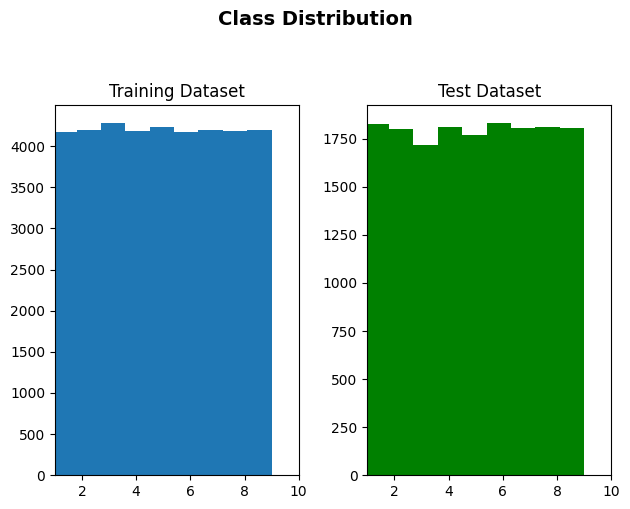

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True)

fig.suptitle('Class Distribution', fontsize=14, fontweight='bold', y=1.05)

ax1.hist(y_train, bins=10)
ax1.set_title("Training Dataset")
ax1.set_xlim(1, 10)

ax2.hist(y_test, color='g', bins=10)
ax2.set_title("Test Dataset")

fig.tight_layout()

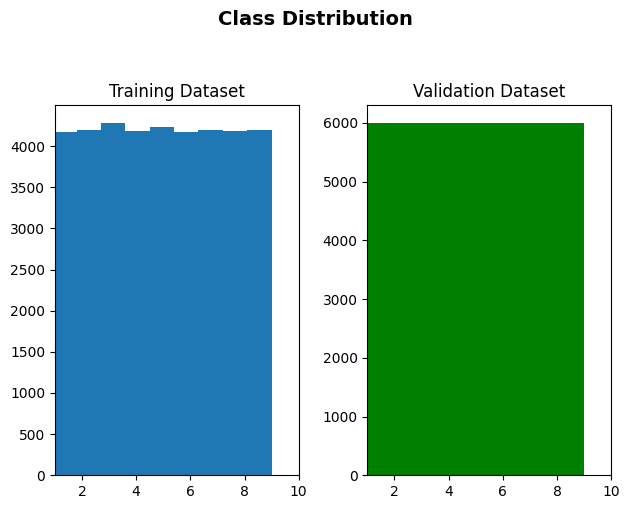

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True)

fig.suptitle('Class Distribution', fontsize=14, fontweight='bold', y=1.05)

ax1.hist(y_train, bins=10)
ax1.set_title("Training Dataset")
ax1.set_xlim(1, 10)

ax2.hist(y_val, color='g', bins=10)
ax2.set_title("Validation Dataset")

fig.tight_layout()

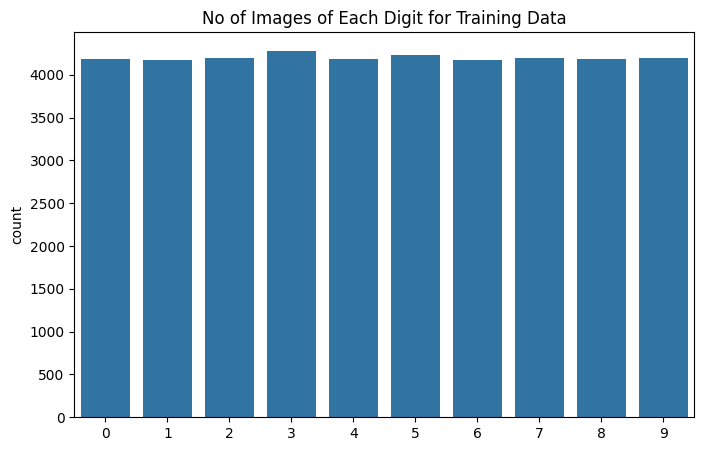

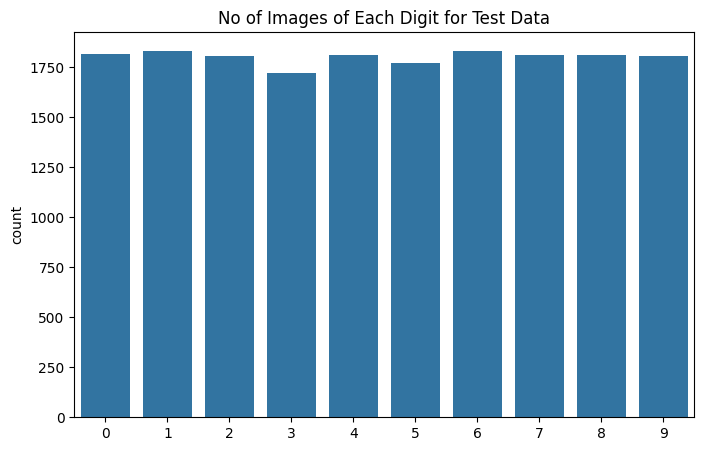

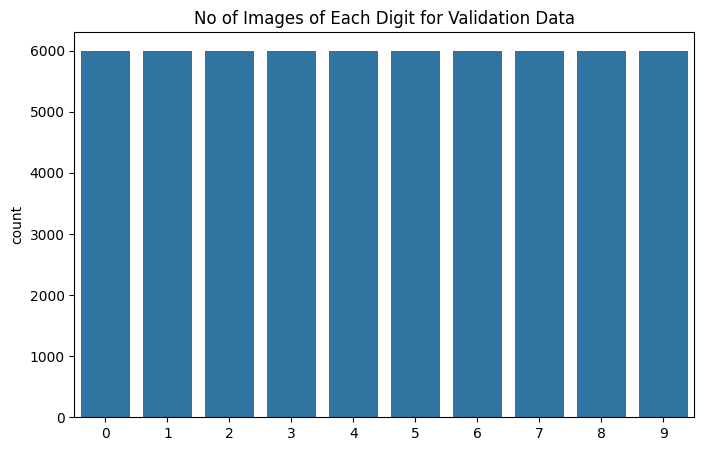

In [ ]:
ax1 = plt.subplots(figsize=(8,5))
ax1 = sns.countplot(x=y_train)

ax1.set_title("No of Images of Each Digit for Training Data")

ax2 = plt.subplots(figsize=(8,5))
ax2 = sns.countplot(x=y_test)

ax2.set_title("No of Images of Each Digit for Test Data")

ax3 = plt.subplots(figsize=(8,5))
ax3 = sns.countplot(x=y_val)

ax3.set_title("No of Images of Each Digit for Validation Data")
plt.show()

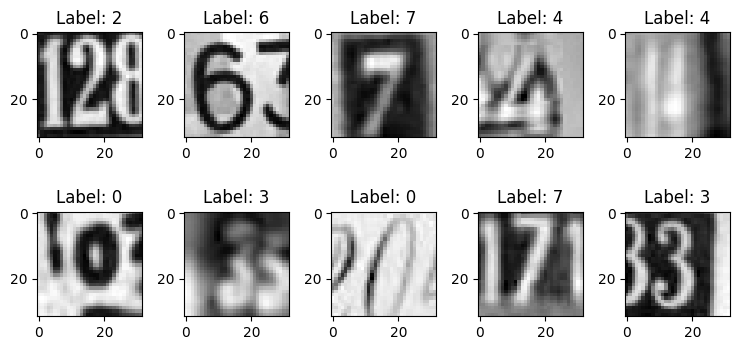

In [ ]:
num_row = 2
num_col = 5
fig,axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(10):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title('Label: {}'.format(y_train[i]))
    plt.tight_layout()

plt.show()

In [ ]:
X_train.shape

(42000, 32, 32)

In [ ]:
y_train.shape

(42000,)

In [ ]:
y_train[1]

6

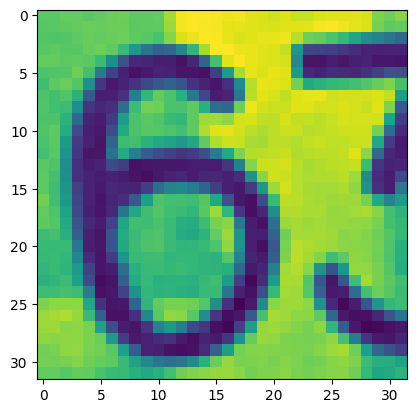

In [ ]:
plt.imshow(X_train[1])

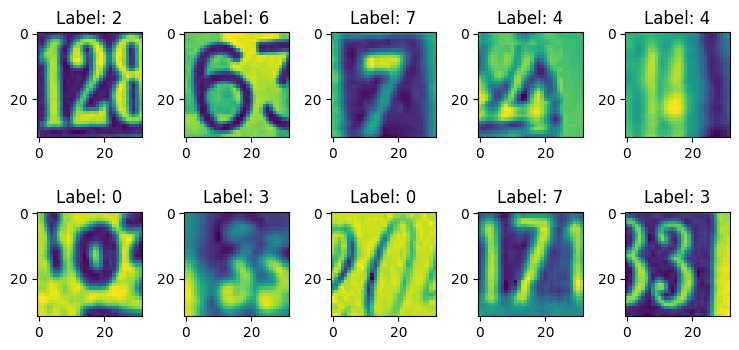

In [ ]:
num_row = 2
num_col = 5
fig,axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(10):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(X_train[i])
    ax.set_title('Label: {}'.format(y_train[i]))
    plt.tight_layout()

plt.show()

In [ ]:
y_train.shape

(42000,)

In [ ]:
# Display the training and predicted data
def plot_images(img,labels,nrows,ncols,pred_labels=None):
    fig = plt.figure(figsize = (25,10));
    axes = fig.subplots(nrows,ncols)
    for i, ax in enumerate(axes.flat):
        ax.imshow(img[i])
        ax.set_xticks([]); ax.set_yticks([])
        if pred_labels is None:
            ax.set_title('True: %d' % labels[i])
        else:
            ax.set_title('True: {0}, Pred: {1}'.format(labels[i], np.argmax(pred_labels[i])))


In [ ]:
plot_images(X_train, y_train, 2, 5)

## 7.2 Data Preprocessing

### Normalization

In [ ]:
import numpy as np
x_train = np.expand_dims(X_train, axis=-1) # <--- add channel axis
x_train = x_train.astype('float32') / 255
x_val = np.expand_dims(X_val, axis=-1) # <--- add channel axis
x_val = x_val.astype('float32') /255
x_test = np.expand_dims(X_test, axis=-1) # <--- add channel axis
x_test = x_test.astype('float32') /255
print("Shape of x_train:",x_train.shape)
print("Shape of x_val:",x_val.shape)
print("Shape of x_test:",x_test.shape)

Shape of x_train: (42000, 32, 32, 1)
Shape of x_val: (60000, 32, 32, 1)
Shape of x_test: (18000, 32, 32, 1)


### Converting labels to categorical data

In [ ]:
y_train=keras.utils.to_categorical(y_train)
y_val=keras.utils.to_categorical(y_val)
y_test=keras.utils.to_categorical(y_test)

print("Shape of ytrain:",y_train.shape)
print("Shape of yval:",y_val.shape)
print("Shape of ytest:",y_test.shape)

Shape of ytrain: (42000, 10)
Shape of yval: (60000, 10)
Shape of ytest: (18000, 10)


In [ ]:
print(np.unique(X_train))

[0.000000e+00 1.140000e-01 2.280000e-01 ... 2.547465e+02 2.548605e+02
 2.549745e+02]


In [ ]:
np.unique(y_train)

array([0., 1.], dtype=float32)

In [ ]:
X_train.shape

(42000, 32, 32)

In [ ]:
x_train.shape

(42000, 32, 32, 1)

<a id ="Create_CNN_Model"> </a>
# 8. Create CNN Model, Validation and Accuracy vs los Visualization

## 8.1. Primary Model

In [ ]:
num_classes = 10      # Number of classes to model

# Define the model
primary_model = Sequential([
    Conv2D(32, kernel_size=(3,3), padding='same', input_shape=(32, 32, 1)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(32, kernel_size=(3,3), padding='same'),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(32, kernel_size=(3,3), padding='same'),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(32, kernel_size=(3,3), padding='same'),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),

    Dense(512),
    Activation('relu'),
    Dropout(0.3),

    Dense(128),
    Activation('relu'),
    Dropout(0.1),

    Dense(num_classes, activation='softmax')])

primary_model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

In [ ]:
primary_model_history = primary_model.fit(x=x_train, y=y_train,
                                          validation_data=(x_val, y_val),
                                          batch_size=32,
                                          epochs=20,
                                          verbose=1)


Epoch 1/20
1313/1313 [==============================] - 52s 39ms/step - loss: 2.3027 - accuracy: 0.0978 - val_loss: 2.3027 - val_accuracy: 0.1015
Epoch 2/20
1313/1313 [==============================] - 49s 37ms/step - loss: 2.3028 - accuracy: 0.1004 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 3/20
1313/1313 [==============================] - 49s 37ms/step - loss: 2.3028 - accuracy: 0.0997 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/20
1313/1313 [==============================] - 48s 37ms/step - loss: 2.3028 - accuracy: 0.0995 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/20
1313/1313 [==============================] - 48s 37ms/step - loss: 2.3028 - accuracy: 0.1005 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 6/20
1313/1313 [==============================] - 48s 37ms/step - loss: 2.3027 - accuracy: 0.1007 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/20
1313/1313 [==============================] - 56s 42ms/step - loss: 2.3028 - accuracy: 0.1014 - val_loss: 2.3026 -

## 8.2. Accuracy and Loss Visualization for 1st model

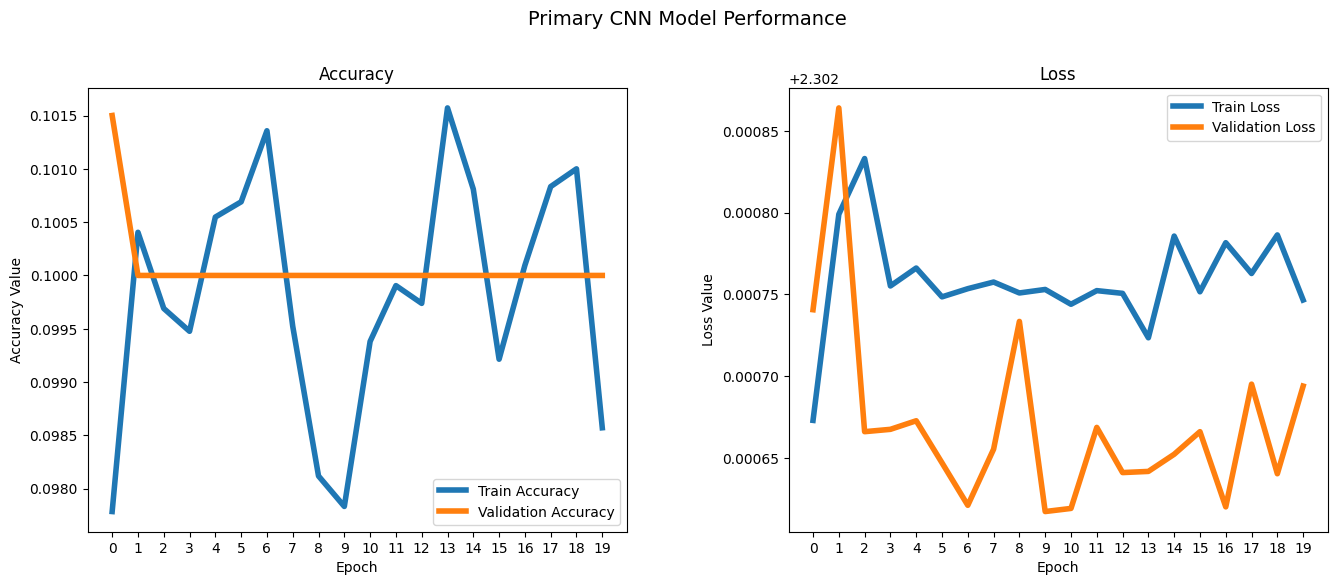

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
title = fig.suptitle('Primary CNN Model Performance', fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, primary_model_history.history['accuracy'], label='Train Accuracy', linewidth=4)
ax1.plot(epoch_list, primary_model_history.history['val_accuracy'], label='Validation Accuracy', linewidth=4)
ax1.set_xticks(np.arange(0, 20))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')

l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, primary_model_history.history['loss'], label='Train Loss',linewidth=4)
ax2.plot(epoch_list, primary_model_history.history['val_loss'], label='Validation Loss',linewidth=4)
ax2.set_xticks(np.arange(0, 20))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

## 8.3. Model Test, number Prediction and accuracy visualization

In [ ]:
primary_model_scores = primary_model.evaluate(x_test, y_test)
print("TEST SET: %s: %.2f%%" % (primary_model.metrics_names[1], primary_model_scores[1]*100))

563/563 [==============================] - 4s 7ms/step - loss: 2.3028 - accuracy: 0.1002
TEST SET: accuracy: 10.02%


In [ ]:
test_predictions = primary_model.predict(x_test)

563/563 [==============================] - 4s 7ms/step


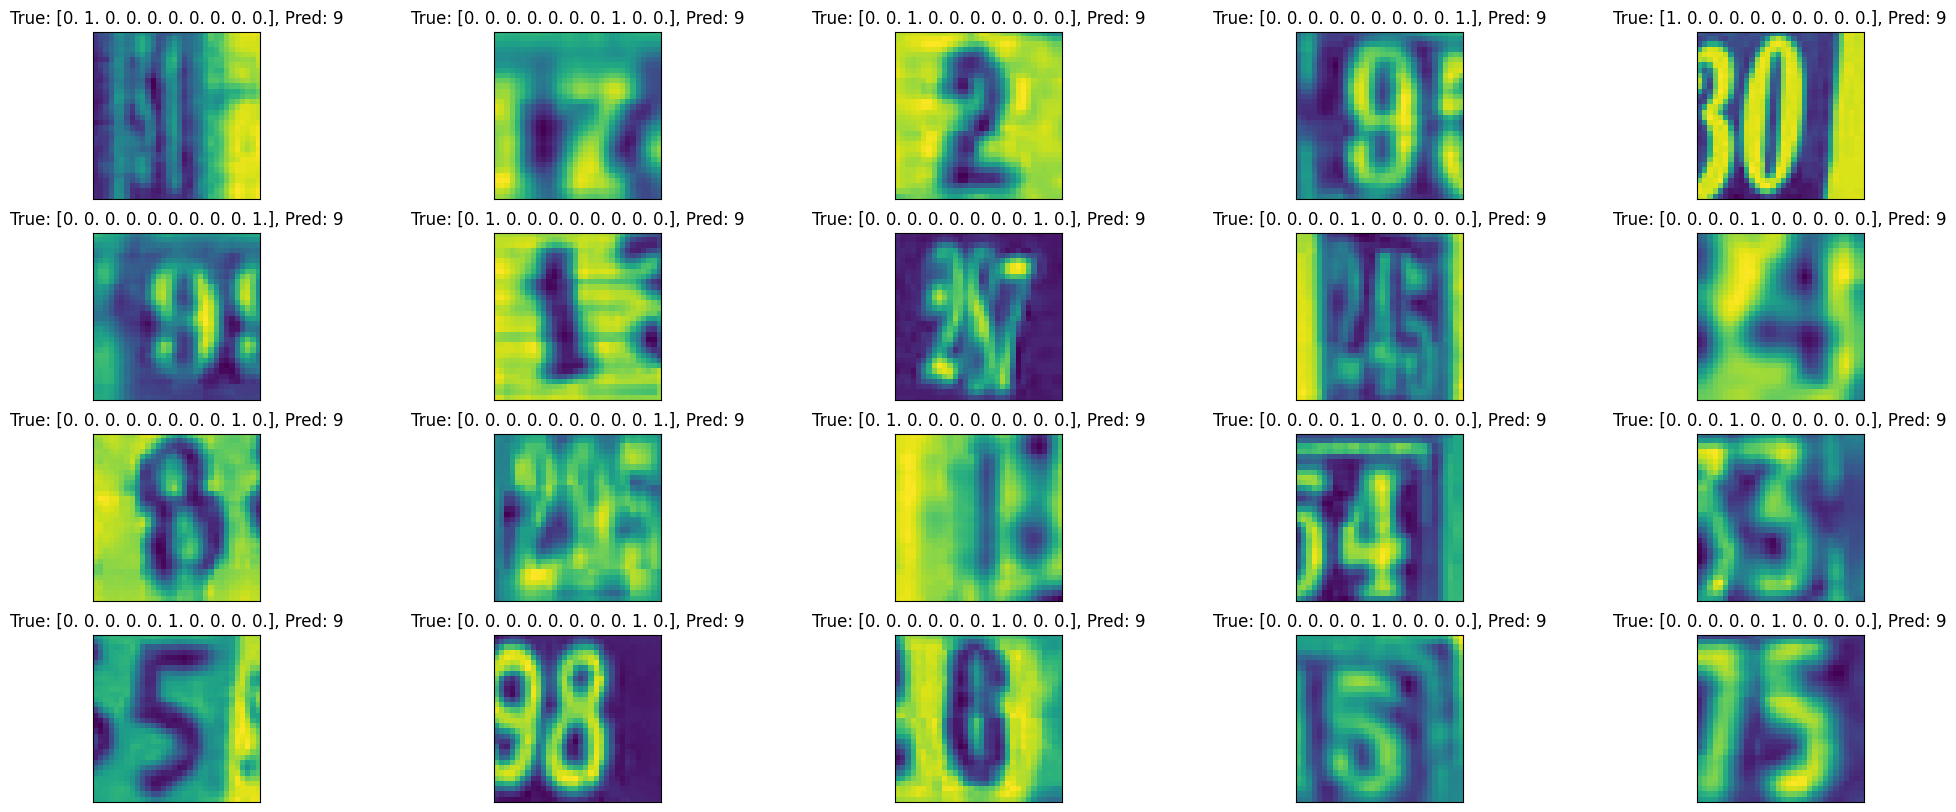

In [ ]:
plot_images(x_test, y_test, 4, 5, test_predictions)

## 8.4. 2nd Model Using Batch Normalization

In [ ]:
# Define the model
model1 = Sequential()

# Add convolutional layers
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model1.add(MaxPooling2D((2, 2)))
# Add hidden layers
model1.add(Conv2D(32, (3, 3), activation='relu'))
model1.add(BatchNormalization()) # Add BatchNormalization layer after the convolutional layer
model1.add(MaxPooling2D((2, 2)))
# Add hidden layers
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(BatchNormalization()) # Add BatchNormalization layer after the convolutional layer
model1.add(MaxPooling2D((2, 2)))

# Add Flatten layers
model1.add(Flatten())
model1.add(Dropout(0.3))

# Add dense layers
model1.add(Dense(64, activation='relu'))
model1.add(BatchNormalization()) # Add BatchNormalization layer after the dense layer

# Add dense layers
model1.add(Dense(128, activation='relu'))
model1.add(BatchNormalization()) # Add BatchNormalization layer after the dense layer
model1.add(Dropout(0.2))

# Add the output layer
model1.add(Dense(10, activation='softmax'))

# Compile the model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 batch_normalization (Batch  (None, 13, 13, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                      

In [ ]:
history1 = model1.fit(x=x_train, y=y_train,
                   validation_data=(x_val, y_val),
                   batch_size=32,
                   epochs=20,
                   verbose=1)

Epoch 1/20
1313/1313 [==============================] - 38s 28ms/step - loss: 1.1914 - accuracy: 0.6081 - val_loss: 0.5927 - val_accuracy: 0.8133
Epoch 2/20
1313/1313 [==============================] - 36s 27ms/step - loss: 0.6283 - accuracy: 0.8031 - val_loss: 0.4577 - val_accuracy: 0.8599
Epoch 3/20
1313/1313 [==============================] - 36s 27ms/step - loss: 0.5256 - accuracy: 0.8370 - val_loss: 0.3800 - val_accuracy: 0.8828
Epoch 4/20
1313/1313 [==============================] - 36s 27ms/step - loss: 0.4782 - accuracy: 0.8520 - val_loss: 0.4048 - val_accuracy: 0.8770
Epoch 5/20
1313/1313 [==============================] - 36s 27ms/step - loss: 0.4417 - accuracy: 0.8648 - val_loss: 0.3640 - val_accuracy: 0.8907
Epoch 6/20
1313/1313 [==============================] - 35s 27ms/step - loss: 0.4209 - accuracy: 0.8693 - val_loss: 0.3144 - val_accuracy: 0.9054
Epoch 7/20
1313/1313 [==============================] - 36s 27ms/step - loss: 0.3932 - accuracy: 0.8791 - val_loss: 0.2899 -

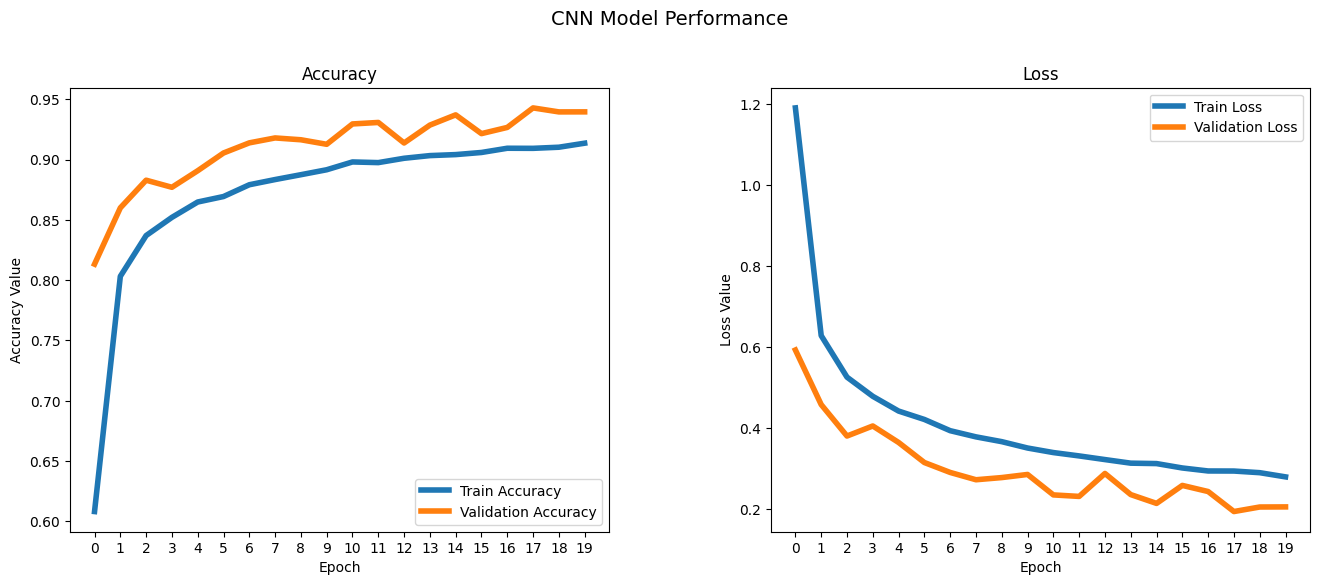

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
title = fig.suptitle('CNN Model Performance', fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history1.history['accuracy'], label='Train Accuracy', linewidth=4)
ax1.plot(epoch_list, history1.history['val_accuracy'], label='Validation Accuracy', linewidth=4)
ax1.set_xticks(np.arange(0, 20))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')

l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history1.history['loss'], label='Train Loss',linewidth=4)
ax2.plot(epoch_list, history1.history['val_loss'], label='Validation Loss',linewidth=4)
ax2.set_xticks(np.arange(0, 20))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
model1_scores = model1.evaluate(x_test, y_test)
print("TEST SET: %s: %.2f%%" % (model1.metrics_names[1], model1_scores[1]*100))

563/563 [==============================] - 4s 6ms/step - loss: 0.2726 - accuracy: 0.9194
TEST SET: accuracy: 91.94%


In [ ]:
test_predictions1 = model1.predict(x_test)

563/563 [==============================] - 3s 6ms/step


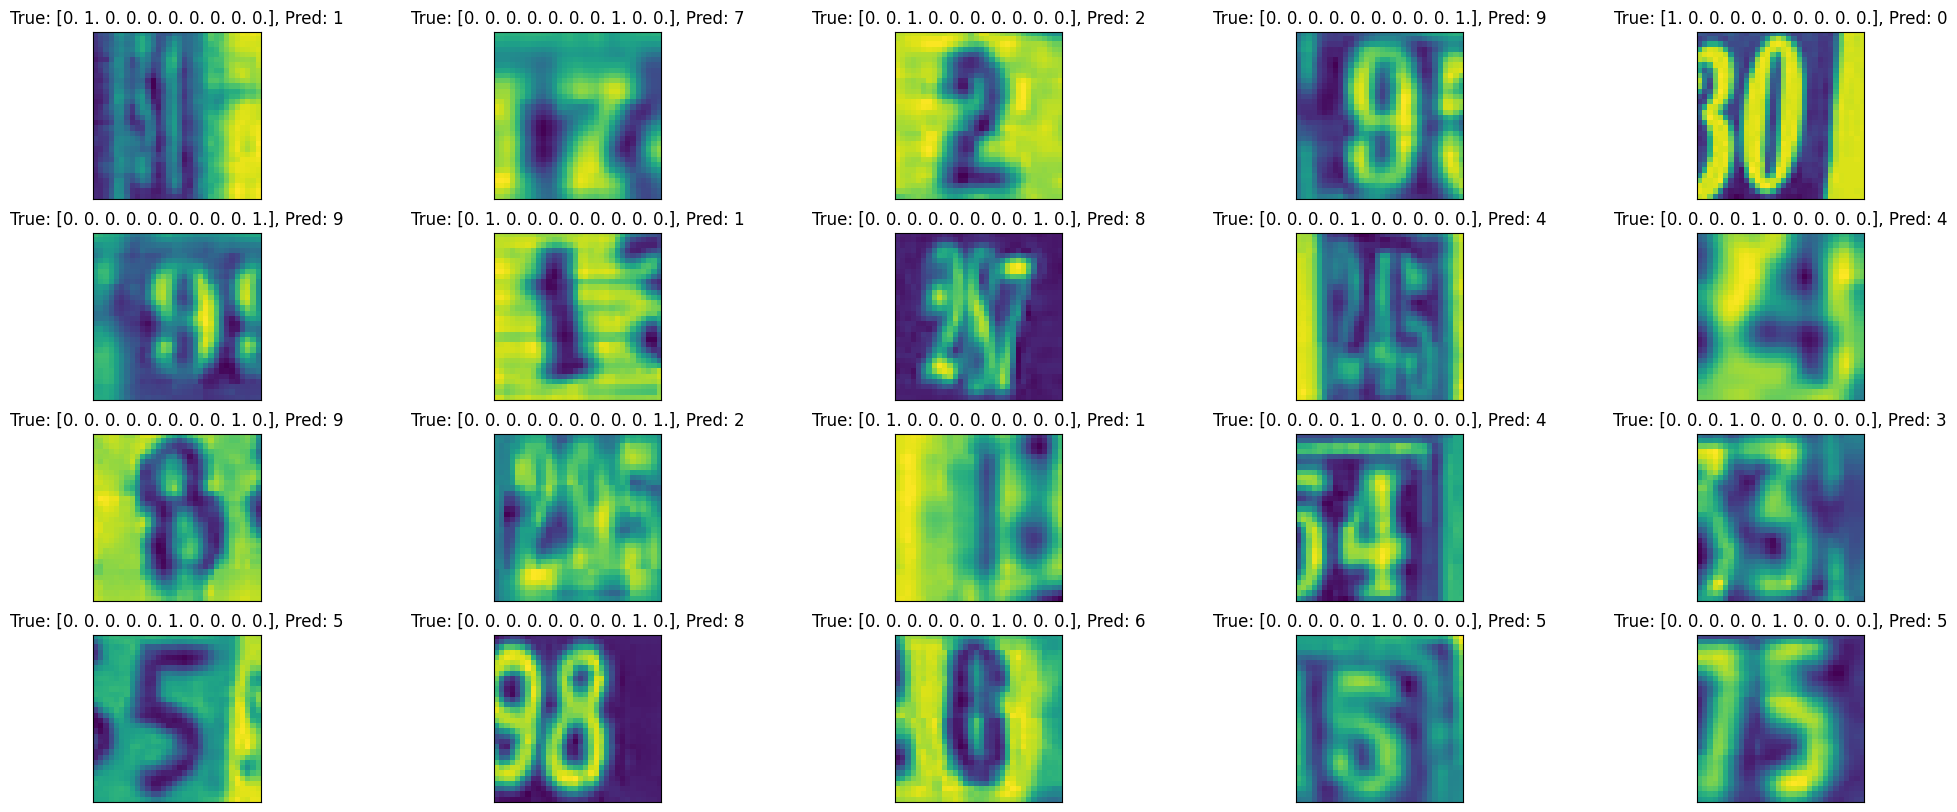

In [ ]:
plot_images(x_test, y_test, 4, 5, test_predictions1)

<a id="Model_Save"></a>
# 9. Model Save, load and Confusion Matrix analysis

In [ ]:
SVHN_Model = model1

In [ ]:
SVHN_Model_Train_score=SVHN_Model.evaluate(x_train, y_train)
print("TRAIN SET: %s: %.2f%%" % (SVHN_Model.metrics_names[1], SVHN_Model_Train_score[1]*100))

1313/1313 [==============================] - 9s 7ms/step - loss: 0.1756 - accuracy: 0.9481
TRAIN SET: accuracy: 94.81%


In [ ]:
SVHN_Model_Train_score=SVHN_Model.evaluate(x_test, y_test)
print("TEST SET: %s: %.2f%%" % (SVHN_Model.metrics_names[1], SVHN_Model_Train_score[1]*100))

563/563 [==============================] - 5s 9ms/step - loss: 0.2726 - accuracy: 0.9194
TEST SET: accuracy: 91.94%


In [ ]:
SVHN_Model_Train_score=SVHN_Model.evaluate(x_val, y_val)
print("TEST SET: %s: %.2f%%" % (SVHN_Model.metrics_names[1], SVHN_Model_Train_score[1]*100))

1875/1875 [==============================] - 12s 7ms/step - loss: 0.2047 - accuracy: 0.9395
TEST SET: accuracy: 93.95%


In [ ]:
# Getting model predictions
SVHN_Model_predictions = SVHN_Model.predict(x_test)
preds = np.argmax(SVHN_Model_predictions, axis=1)

563/563 [==============================] - 3s 6ms/step


In [ ]:
np.argmax(SVHN_Model_predictions)

160593

In [ ]:
y_test_arg=np.argmax(y_test,axis=1)
y_pred = np.argmax(SVHN_Model.predict(x_test),axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, y_pred))

563/563 [==============================] - 5s 8ms/step
Confusion Matrix
[[1691   22    9    8    8    3   18   11    7   37]
 [  14 1640   22   27   35   13   12   52   10    3]
 [   6    6 1679   15    9    6    2   42   10   28]
 [   4    7   13 1571    6   54   12   27   13   12]
 [   7   26   22   13 1680   19   11   11    6   17]
 [   0    6    4   68    5 1639   20    8    9    9]
 [  16    9   12   15   15   57 1665    7   29    7]
 [   3   23   18   11   11    2    4 1728    2    6]
 [  16   11   13   35    7   20   64   11 1597   38]
 [  28    8   15   26    9   20   11   18   10 1659]]


In [ ]:
print(classification_report(y_test_arg, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1814
           1       0.93      0.90      0.91      1828
           2       0.93      0.93      0.93      1803
           3       0.88      0.91      0.90      1719
           4       0.94      0.93      0.93      1812
           5       0.89      0.93      0.91      1768
           6       0.92      0.91      0.91      1832
           7       0.90      0.96      0.93      1808
           8       0.94      0.88      0.91      1812
           9       0.91      0.92      0.92      1804

    accuracy                           0.92     18000
   macro avg       0.92      0.92      0.92     18000
weighted avg       0.92      0.92      0.92     18000



### Plotting Confusion Matrix

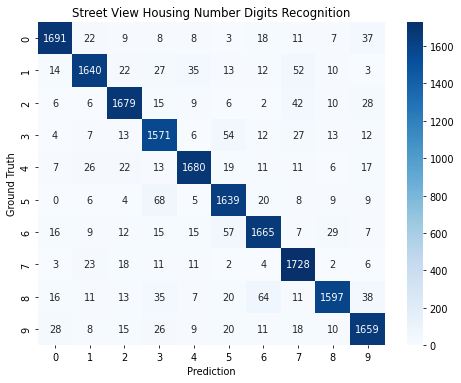

In [ ]:
# Defining labels
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


# To evaluate the accuracy of the classification
cnf = confusion_matrix(y_test_arg, y_pred)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')

# Plotting rectangular data as a color-encoded matrix.
ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.title('Street View Housing Number Digits Recognition')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show(ax)

<a id="conclusion"></a>
# 11. Conclusion

* <p><mark style="background-color: white; color: black;"><font size="4">
    In conclusion, our evaluation of the model shows promising results on the image classification task. The model achieved an accuracy of 92%, precision of 92%, recall of 92%, and an F1 score of 92%. It performed particularly well on classifying objects in the validation set, with an accuracy of 92.90%.</font></mark ></p>

* <p><mark style="background-color: white; color: black;"><font size="4">
    However, there are still some limitations in the model. It struggled with classifying images that contained multiple objects, and it didn't perform as well on the test set, which had images that were not seen during training.</font></mark ></p>

* <p><mark style="background-color: white; color: black;"><font size="4">
    In future work, we plan to improve the model's performance by fine-tuning the architecture, experimenting with different image preprocessing techniques, and incorporating more data to the training set. </font></mark ></p>

* <p><mark style="background-color: white; color: black;"><font size="4">
    Despite these limitations, the model has shown great potential for real-world applications and we believe it could be a valuable tool for solving complex image classification problems.</font></mark ></p>